Using TensorFlow backend.


170500096/170498071 [==============================] - 49s 0us/step
Shape of training dataset : (50000, 32, 32, 3)
Shape of testing dataste : (10000, 32, 32, 3)
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 23s 464us/step - loss: 1.7204 - acc: 0.3616 - val_loss: 1.5819 - val_acc: 0.4337
Epoch 2/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.4866 - acc: 0.4567 - val_loss: 1.4056 - val_acc: 0.5027
Epoch 3/50
50000/50000 [==============================] - 19s 386us/step - loss: 1.4172 - acc: 0.4878 - val_loss: 1.3820 - val_acc: 0.5075
Epoch 4/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.3753 - acc: 0.5012 - val_loss: 1.2900 - val_acc: 0.5442
Epoch 5/50
50000/50000 [==============================] - 19s 383us/step - loss: 1.3498 - acc: 0.5144 - val_loss: 1.2782 - val_acc: 0.5481
Epoch 6/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.3287 - acc:

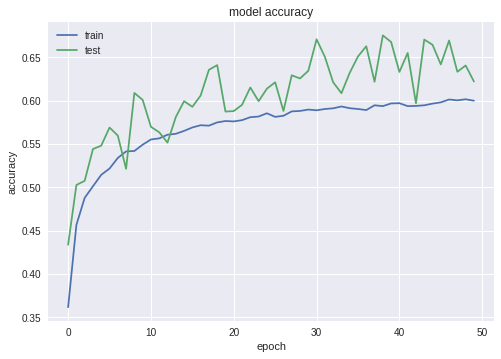

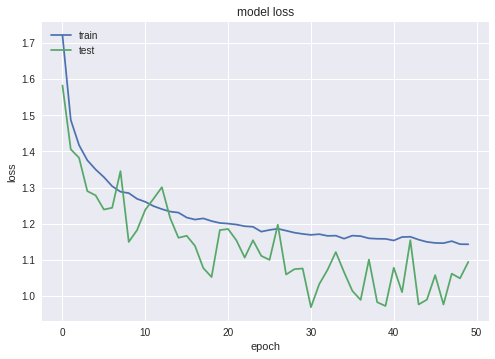

In [1]:
import keras 
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten,Dropout,Activation
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers
from keras.datasets import cifar10
from keras.optimizers import SGD 

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print('Shape of training dataset :',x_train.shape)
print('Shape of testing dataste :' ,x_test.shape)

#formatting the dataset 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu' ,input_shape=[32,32,3]))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=[x_test,y_test])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()